Note: data1 is 80% trainig data and data2 is 20% testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("WPI all comodities.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,108.0
1,2013-02-01,108.4
2,2013-03-01,108.6
3,2013-04-01,108.6
4,2013-05-01,108.6
...,...,...
108,2022-01-01,143.8
109,2022-02-01,145.3
110,2022-03-01,148.9
111,2022-04-01,151.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,108.0
2013-02-01,108.4
2013-03-01,108.6
2013-04-01,108.6
2013-05-01,108.6
...,...
2022-01-01,143.8
2022-02-01,145.3
2022-03-01,148.9


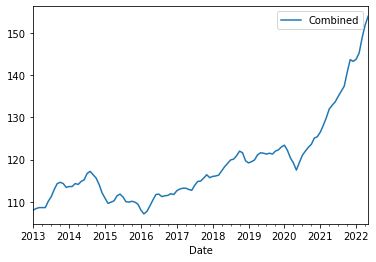

In [10]:
data.plot()

In [11]:
data1 = data.iloc[0:96]
data1

,Combined
Date,
2013-01-01,108.0
2013-02-01,108.4
2013-03-01,108.6
2013-04-01,108.6
2013-05-01,108.6
...,...
2020-08-01,122.0
2020-09-01,122.9
2020-10-01,123.6


## Checking whether the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
adftest

(-0.7928013680504864,
 0.8212274711136813,
 3,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 188.96054106899348)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [13]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.8212274711136813


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [14]:
data1["Combined first difference"]=data1-data1.shift(1)
data1

,Combined,Combined first difference
Date,,
2013-01-01,108.0,NaN
2013-02-01,108.4,0.4
2013-03-01,108.6,0.2
2013-04-01,108.6,0.0
2013-05-01,108.6,0.0
...,...,...
2020-08-01,122.0,1.0
2020-09-01,122.9,0.9
2020-10-01,123.6,0.7


In [15]:
adftest = adfuller(data1["Combined first difference"].dropna())
adftest

(-5.6918975362539435,
 8.03550712553155e-07,
 2,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 185.65651866003776)

Now data is stationary

In [16]:
data1["Combined 12 difference"] = data1['Combined']-data1['Combined'].shift(12)
data1["Combined 12 difference"]

Date
2013-01-01    NaN
2013-02-01    NaN
2013-03-01    NaN
2013-04-01    NaN
2013-05-01    NaN
             ... 
2020-08-01    0.5
2020-09-01    1.6
2020-10-01    1.6
2020-11-01    2.8
2020-12-01    2.4
Name: Combined 12 difference, Length: 96, dtype: float64

## ACF and PACF Graph

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

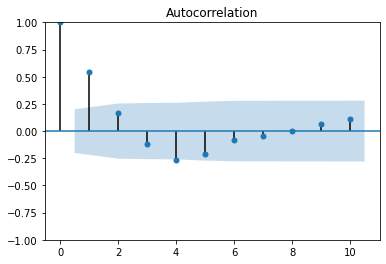

In [18]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data1["Combined first difference"].dropna(),lags=10)

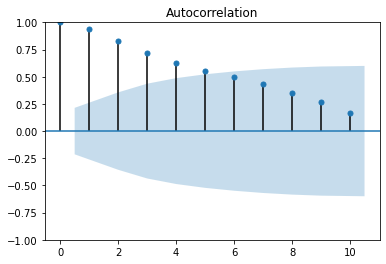

In [19]:
acf12 = plot_acf(data1["Combined 12 difference"].dropna(),lags=10)

from acf12_second graph we get the value of q = 5

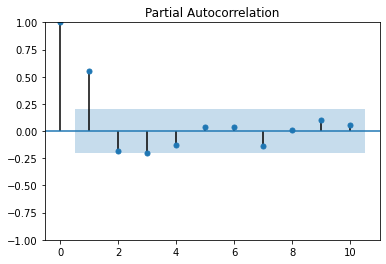

In [20]:
pacf = plot_pacf(data1["Combined first difference"].dropna(),lags=10)

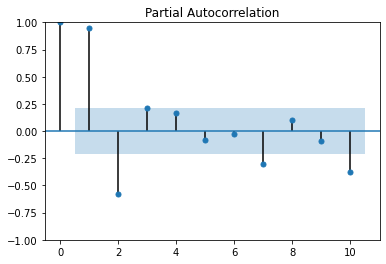

In [21]:
pacf12 = plot_pacf(data1["Combined 12 difference"].dropna(),lags=10)

From PACF we get the value of p = 4

## Sarima model fitting

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_SARIMA = SARIMAX(data1["Combined"],order=(3,1,3),seasonal_order = (3,0,3,12))

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                   96
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 12)   Log Likelihood                 -94.593
Date:                            Fri, 12 Aug 2022   AIC                            215.185
Time:                                    16:52:40   BIC                            248.386
Sample:                                01-01-2013   HQIC                           228.601
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4176      0.379      1.101      0.271      -0.325       1.161
ar.L2         -0.6511      0.286     -2.277      0.023      -1.211      -0.091
ar.L3          0.0039      0.288      0.013      0.989      -0.560       0.568
ma.L1          0.1795      0.358      0.501      0.617      -0.523       0.882
ma.L2          0.8566      0.198      4.324      0.000       0.468       1.245
ma.L3          0.4184      0.311      1.344      0.179      -0.192       1.029
ar.S.L12       0.0232      0.618      0.037      0.970      -1.189       1.235
ar.S.L24      -0.1019      0.840     -0.121      0.903      -1.749       1.545
ar.S.L36      -0.3004      0.759     -0.396      0.692      -1.788       1.187
ma.S.L12       0.0605      3.724      0.016      0.987      -7.238       7.359
ma.S.L24       0.1223      4.444      0.028      0.978      -8.587       8.832
ma.S.L36       0.9309      6.565      0.142      0.887     -11.936      13.798
sigma2         0.3205      1.956      0.164      0.870      -3.514       4.155
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.90   Prob(JB):                         0.40
Heteroskedasticity (H):               1.35   Skew:                             0.29
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [26]:
from datetime import datetime,timedelta
data1['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2020,12,1))
data1['pred_Sarima']

Date
2013-01-01      0.000000
2013-02-01    108.000049
2013-03-01    108.623179
2013-04-01    108.670598
2013-05-01    108.534833
                 ...    
2020-08-01    122.285901
2020-09-01    122.523541
2020-10-01    123.279200
2020-11-01    124.219045
2020-12-01    126.198505
Name: pred_Sarima, Length: 96, dtype: float64

## Residuals

In [27]:
data1['residuals'] = data1["Combined"]-data1['pred_Sarima']
data1['residuals']

Date
2013-01-01    108.000000
2013-02-01      0.399951
2013-03-01     -0.023179
2013-04-01     -0.070598
2013-05-01      0.065167
                 ...    
2020-08-01     -0.285901
2020-09-01      0.376459
2020-10-01      0.320800
2020-11-01      0.880955
2020-12-01     -0.798505
Name: residuals, Length: 96, dtype: float64

In [28]:
data1

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,108.0,NaN,NaN,0.000000,108.000000
2013-02-01,108.4,0.4,NaN,108.000049,0.399951
2013-03-01,108.6,0.2,NaN,108.623179,-0.023179
2013-04-01,108.6,0.0,NaN,108.670598,-0.070598
2013-05-01,108.6,0.0,NaN,108.534833,0.065167
...,...,...,...,...,...
2020-08-01,122.0,1.0,0.5,122.285901,-0.285901
2020-09-01,122.9,0.9,1.6,122.523541,0.376459
2020-10-01,123.6,0.7,1.6,123.279200,0.320800


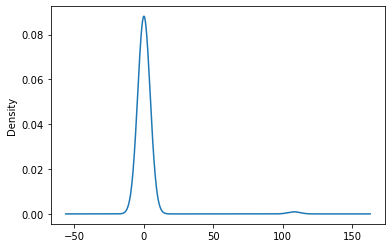

In [29]:
model_SARIMA_fit.resid.plot(kind = "kde")

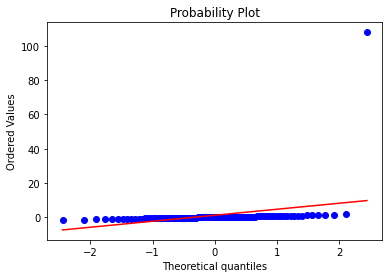

In [30]:
import pylab
from scipy import stats
stats.probplot(data1["residuals"],dist='norm',plot=pylab)
pylab.show()


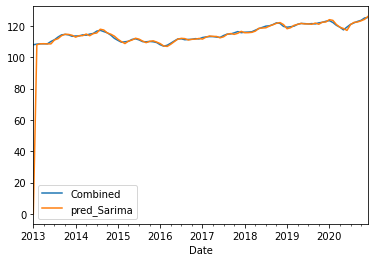

In [31]:
data1[['Combined','pred_Sarima']].plot()

#### Original dataset and our predicted values are nearby same

## Prediction from Jan 2021 to May 2022

In [32]:
data2 = data.iloc[96:113,0:1]
data2

,Combined
Date,
2021-01-01,126.5
2021-02-01,128.1
2021-03-01,129.9
2021-04-01,132.0
2021-05-01,132.9
2021-06-01,133.7
2021-07-01,135.0
2021-08-01,136.2
2021-09-01,137.4


In [33]:
pred_Sarima1 = model_SARIMA_fit.predict(start = datetime(2020,1,1),end = datetime(2022,5,1))
pred_Sarima1

2020-01-01    124.031671
2020-02-01    123.560236
2020-03-01    120.910342
2020-04-01    119.193866
2020-05-01    118.362675
2020-06-01    117.159188
2020-07-01    120.824488
2020-08-01    122.285901
2020-09-01    122.523541
2020-10-01    123.279200
2020-11-01    124.219045
2020-12-01    126.198505
2021-01-01    126.101513
2021-02-01    126.104294
2021-03-01    125.382808
2021-04-01    125.460196
2021-05-01    125.785896
2021-06-01    126.483151
2021-07-01    127.089244
2021-08-01    127.414572
2021-09-01    127.847221
2021-10-01    128.313158
2021-11-01    128.190048
2021-12-01    127.416199
2022-01-01    127.516946
2022-02-01    127.954395
2022-03-01    128.015993
2022-04-01    128.128864
2022-05-01    127.978420
Freq: MS, Name: predicted_mean, dtype: float64

In [34]:
data2['pred_Sarima1'] = pred_Sarima1

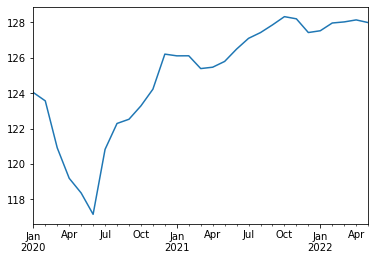

In [35]:
pred_Sarima1.plot()

In [36]:
data['pred_Sarima1'] = pred_Sarima1

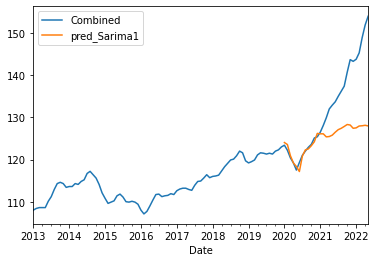

In [37]:
data[['Combined','pred_Sarima1']].plot()

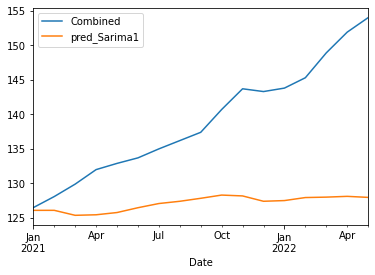

In [38]:
data2[['Combined','pred_Sarima1']].plot()

## Future prediction from June 2022 to May 2023

In [39]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,6,1),end = datetime(2023,5,1))
pred_Sarima2

2022-06-01    127.765073
2022-07-01    127.757274
2022-08-01    128.268526
2022-09-01    128.285174
2022-10-01    128.549255
2022-11-01    128.420164
2022-12-01    128.648222
2023-01-01    128.438643
2023-02-01    127.570737
2023-03-01    126.791256
2023-04-01    126.181606
2023-05-01    125.687594
Freq: MS, Name: predicted_mean, dtype: float64

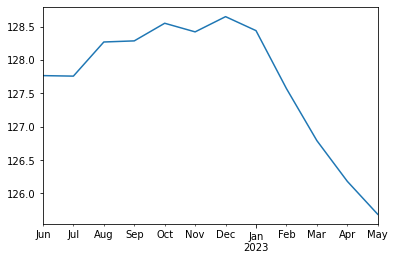

In [40]:
pred_Sarima2.plot()

## Mean Square Error

In [41]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(data2["Combined"],data2['pred_Sarima1'])
MSE

193.62677574069724